# DataJoint U24 - Workflow Session

This notebook will describe the steps to explore the lab and animal management tables created by the elements.
Prior to using this notebook, please refer to the README for the installation instructions.

In [1]:
# change to the upper level folder to detect dj_local_conf.json
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
import datajoint as dj
dj.conn()

Connecting root@localhost:3306


DataJoint connection (connected) root@localhost:3306

Importing the module `workflow_session.pipeline` is sufficient to create tables inside the elements. This workflow comes prepackaged with example data and ingestion functions to populate lab, subject, and session tables.

In [2]:
from element_lab import lab
from element_animal import subject
from element_session import session
from workflow_session.ingest import ingest_lab, ingest_subjects, ingest_sessions

In [5]:
ingest_lab(); ingest_subjects();ingest_sessions()


---- Inserting 0 entry(s) into #lab ----

---- Inserting 0 entry(s) into #location ----

---- Inserting 0 entry(s) into #project ----

---- Inserting 2 entry(s) into #project__source_code ----

---- Inserting 2 entry(s) into #project__publication ----

---- Inserting 3 entry(s) into #project__keywords ----

---- Inserting 2 entry(s) into #protocol_type ----

---- Inserting 2 entry(s) into #protocol ----

---- Inserting 2 entry(s) into #user_role ----

---- Inserting 3 entry(s) into #user ----

---- Inserting 3 entry(s) into #lab_membership ----

---- Inserting 4 entry(s) into project_user ----

---- Inserting 2 entry(s) into subject ----

---- Inserting 2 entry(s) into subject_death ----

---- Inserting 2 entry(s) into subject_cull_method ----

---- Inserting 2 entry(s) into session ----

---- Inserting 2 entry(s) into session_directory ----

---- Inserting 2 entry(s) into session_note ----


## Workflow architecture

In [6]:
lab.Lab()

lab Abbreviated lab name,lab_name full lab name,institution,address,time_zone
LabA,The Example Lab,Example Uni,'221B Baker St,London NW1 6XE
LabB,The Other Lab,Other Uni,'Oxford OX1 2JD,United Kingdom'


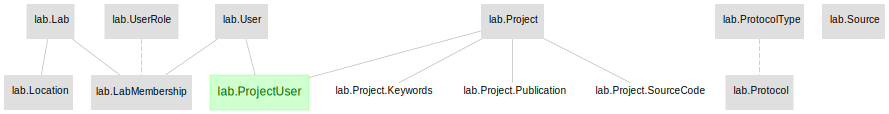

In [7]:
dj.Diagram(lab)

In [8]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject5,F,2020-01-01,rich
subject6,M,2020-01-01,manuel


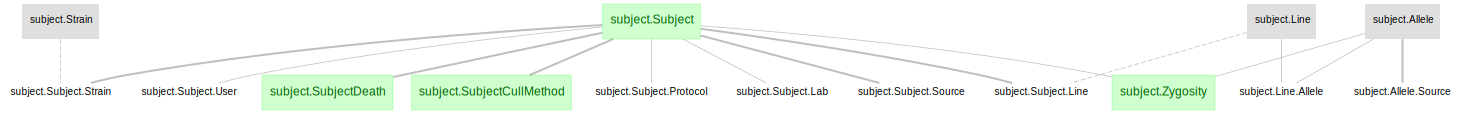

In [9]:
dj.Diagram(subject)

In [10]:
session.Session()

subject,session_datetime
subject5,2020-04-15 11:16:38
subject6,2021-06-02 14:04:22


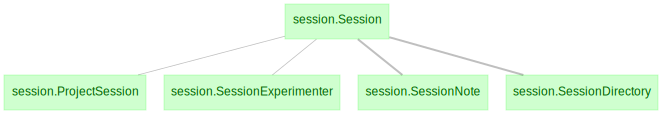

In [11]:
dj.Diagram(session)

(Workflow needs continued development to import geotyping tables)

In [12]:
# dj.Diagram(genotyping) + dj.Diagram(subject.Subject) + dj.Diagram(subject.Allele)

## Explore each table

In [13]:
# check table definition with describe()
subject.Subject.describe()

# Animal Subject
subject              : varchar(8)                   
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



'# Animal Subject\nsubject              : varchar(8)                   \n---\nsex                  : enum(\'M\',\'F\',\'U\')            \nsubject_birth_date   : date                         \nsubject_description="" : varchar(1024)                \n'

In [14]:
# check table definition with dependencies with describe()
subject.Zygosity.describe()

-> subject.Subject
-> subject.Allele
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') 



"-> subject.Subject\n-> subject.Allele\n---\nzygosity             : enum('Present','Absent','Homozygous','Heterozygous') \n"

In [15]:
# check the name of every attribute with heading, 
# which will spell out the foreign key definition inherited from another table
subject.Zygosity.heading

# 
subject              : varchar(8)                   # 
allele               : varchar(32)                  # abbreviated allele name
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # 

## Insert data into Manual and Lookup tables

Tables in this workflow are either manual tables or lookup tables. To insert into these tables, DataJoint provide method `.insert1()` and `insert()`.

In [16]:
subject.Subject.insert1(
    dict(subject='subject1', sex='M', subject_birth_date='2020-12-30', 
         subject_description='test animal'), skip_duplicates=True)
subject.Subject.insert1(
    ('subject2', 'F', '2020-11-30', 'test animal'), skip_duplicates=True)

`skip_duplicates=True` will prevent an error if you already have data for the primary keys in a given entry.

In [17]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject5,F,2020-01-01,rich
subject6,M,2020-01-01,manuel


In [18]:
# `insert()` takes a list of dicts or tuples
subject.Subject.insert(
    [dict(subject='subject3', sex='F', subject_birth_date='2020-12-30', 
            subject_description='test animal'),
     dict(subject='subject4', sex='M', subject_birth_date='2021-02-12', 
          subject_description='test animal')
    ],
    skip_duplicates=True)
subject.Subject.insert(
    [
        ('subject7', 'U', '2020-08-30', 'test animal'),
        ('subject8', 'F', '2020-09-30', 'test animal')
    ],
    skip_duplicates=True)

In [19]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject3,F,2020-12-30,test animal
subject4,M,2021-02-12,test animal
subject5,F,2020-01-01,rich
subject6,M,2020-01-01,manuel
subject7,U,2020-08-30,test animal
subject8,F,2020-09-30,test animal


For more documentation of insert, please refer to [DataJoint Docs](https://docs.datajoint.io/python/manipulation/1-Insert.html) and [DataJoint playground](https://playground.datajoint.io/)

## Insert into Manual and Lookup tables with Graphical User Interface

DataJoint also provides a Graphical User Interface [DataJoint Labbook](https://github.com/datajoint/datajoint-labbook) to support manual data insertions into DataJoint workflows. ![DataJoint Labbook preview](https://github.com/datajoint/datajoint-labbook/blob/master/docs/sphinx/_static/images/walkthroughDemoOptimized.gif)